# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import numpy as np
import pandas as pd

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [4]:
#your code here
boston = pd.read_csv('Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [5]:
#your code here
#Will test RM and CRIM (average number of rooms per dwelling and per capita crime rate by town)

<AxesSubplot:xlabel='crim', ylabel='medv'>

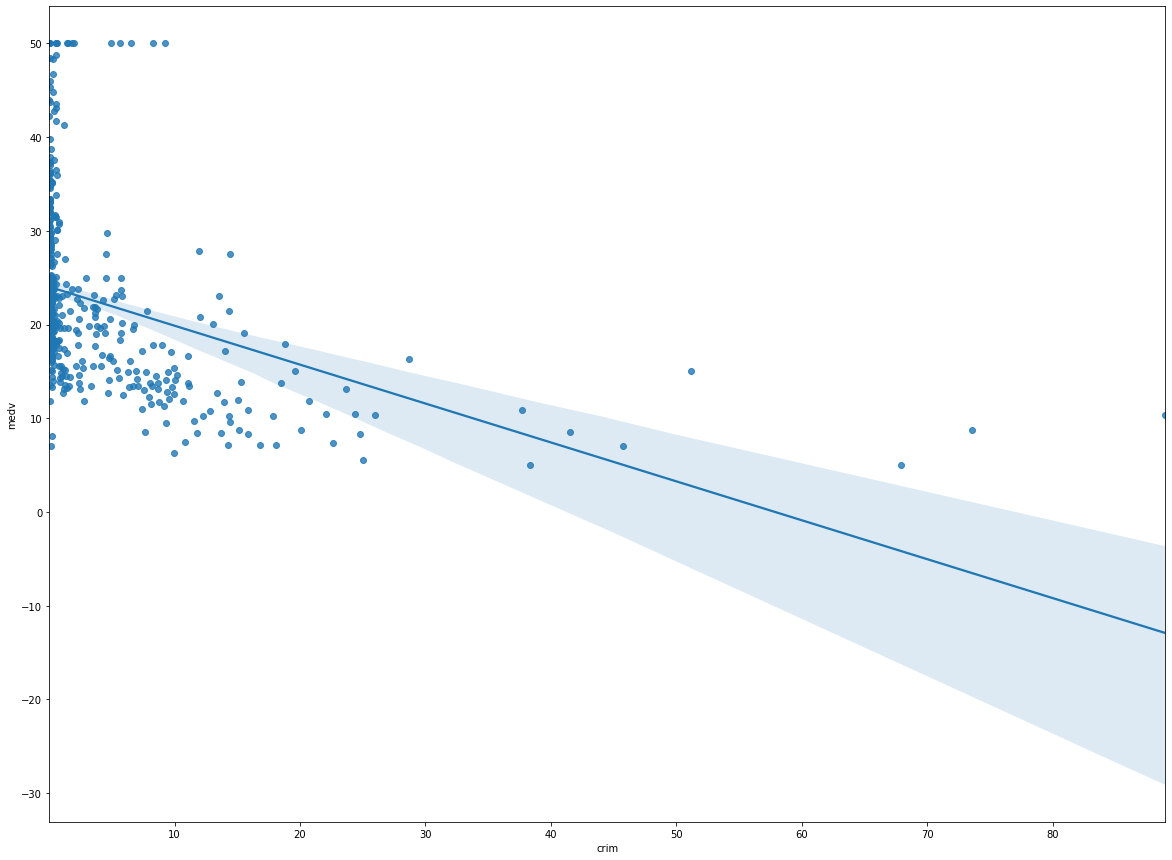

In [6]:
# Your plots here
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.regplot(data = boston, x = 'crim', y = 'medv')

<AxesSubplot:xlabel='rm', ylabel='medv'>

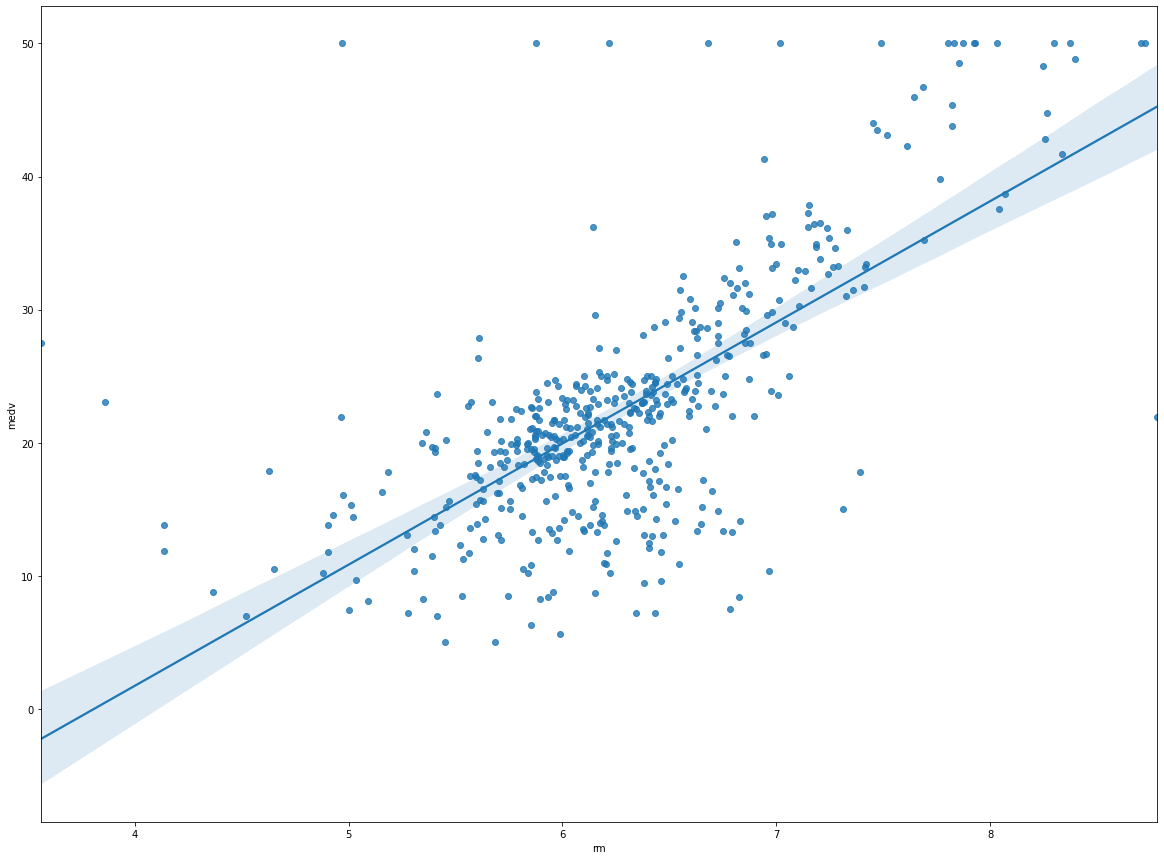

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.regplot(data = boston, x = 'rm', y = 'medv')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [ ]:
### Your response here

#Crime and house value:
#This tells us that there is a negative correlation between house price and crime rate per capita
#This is as I expected because as crime increases, house prices decrease

#Rooms and house value:
#There is positive correlation between rooms and house value 
#This is as expected because as there are more rooms, the house price increases

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

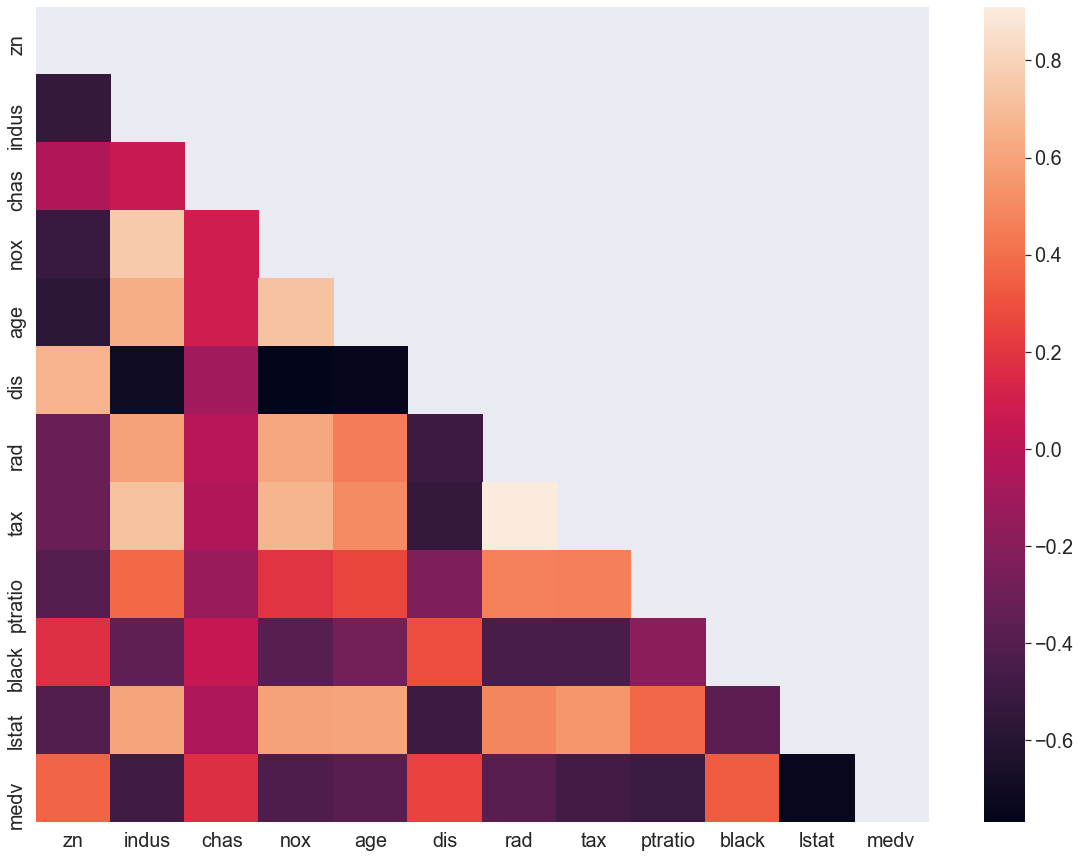

In [8]:
#your code here
#boston.dtypes
#boston.columns
boston_heatmap = boston.drop(columns = ['crim', 'rm', 'Unnamed: 0'], inplace = False)
mask = np.triu(np.ones_like(boston_heatmap.corr(), dtype=bool))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.8)
sns.heatmap(boston_heatmap.corr(), mask = mask)

In [ ]:
#paolo: nice fat heatmap!

#### Significant correlations


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [9]:
#your code here

#LSTAT has a strong negative correlation to house price
#DIS is very negatively correlated with INDUS, NOX and AGE
#RAD and TAX are very strongly correlated

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
# Your code here
print('median   ', boston['medv'].median())
print(boston['medv'].describe())

median    21.2
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [11]:
# boston.drop(columns ='Unnamed: 0', inplace = True)
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [12]:
#your code here
from sklearn.model_selection import train_test_split

X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 
            'black', 'lstat']]
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [13]:
#your code here
from sklearn.ensemble import RandomForestRegressor

# 2
model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred2})

,test,predicted
173,23.6,22.660536
274,32.4,27.193777
491,13.6,15.491606
72,22.8,25.534780
452,16.1,15.848843
...,...,...
418,8.8,14.187477
117,19.2,22.233570
42,25.3,25.534780
322,20.4,24.262710


In [14]:
print(model2.score(X,y))

0.7670563823223236


In [15]:
# 4
model4 = RandomForestRegressor(max_depth=4, random_state=0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred4})

,test,predicted
173,23.6,21.676022
274,32.4,29.484452
491,13.6,16.086606
72,22.8,23.351248
452,16.1,17.207838
...,...,...
418,8.8,10.087456
117,19.2,21.326149
42,25.3,23.231405
322,20.4,22.375242


In [16]:
print(model4.score(X,y))

0.8968102932736176


In [17]:
# 6
model6 = RandomForestRegressor(max_depth=6, random_state=0)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred6})

,test,predicted
173,23.6,22.160849
274,32.4,30.975383
491,13.6,16.341843
72,22.8,23.049459
452,16.1,17.300436
...,...,...
418,8.8,8.751229
117,19.2,21.171101
42,25.3,23.387168
322,20.4,22.030489


In [18]:
print(model6.score(X,y))

0.9300943767496533


In [19]:
# 8
model8 = RandomForestRegressor(max_depth=8, random_state=0)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred8})

,test,predicted
173,23.6,22.443084
274,32.4,31.381940
491,13.6,16.382190
72,22.8,23.484526
452,16.1,17.612131
...,...,...
418,8.8,8.197917
117,19.2,21.063442
42,25.3,23.862345
322,20.4,21.939437


In [20]:
print(model8.score(X,y))

0.9438603831573571


In [21]:
# 10
model10 = RandomForestRegressor(max_depth=10, random_state=0)
model10.fit(X_train, y_train)
y_pred10 = model10.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred10})

,test,predicted
173,23.6,22.635686
274,32.4,31.554377
491,13.6,16.405963
72,22.8,23.613358
452,16.1,17.420346
...,...,...
418,8.8,8.068578
117,19.2,20.885817
42,25.3,24.157137
322,20.4,22.070559


In [22]:
print(model10.score(X,y))

0.9483295169461897


Now, plot the score for each tree on the training set and on the testing set.

In [23]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
model_results = [{'model2' : model2.score(X,y),
'model4' : model4.score(X,y),
'model6' : model6.score(X,y),
'model8' : model8.score(X,y),
'model10': model10.score(X,y)}]

results_df = pd.DataFrame.from_records(data = model_results)
results_df.T


,0
model2,0.767056
model4,0.896810
model6,0.930094
model8,0.943860
model10,0.948330


<AxesSubplot:>

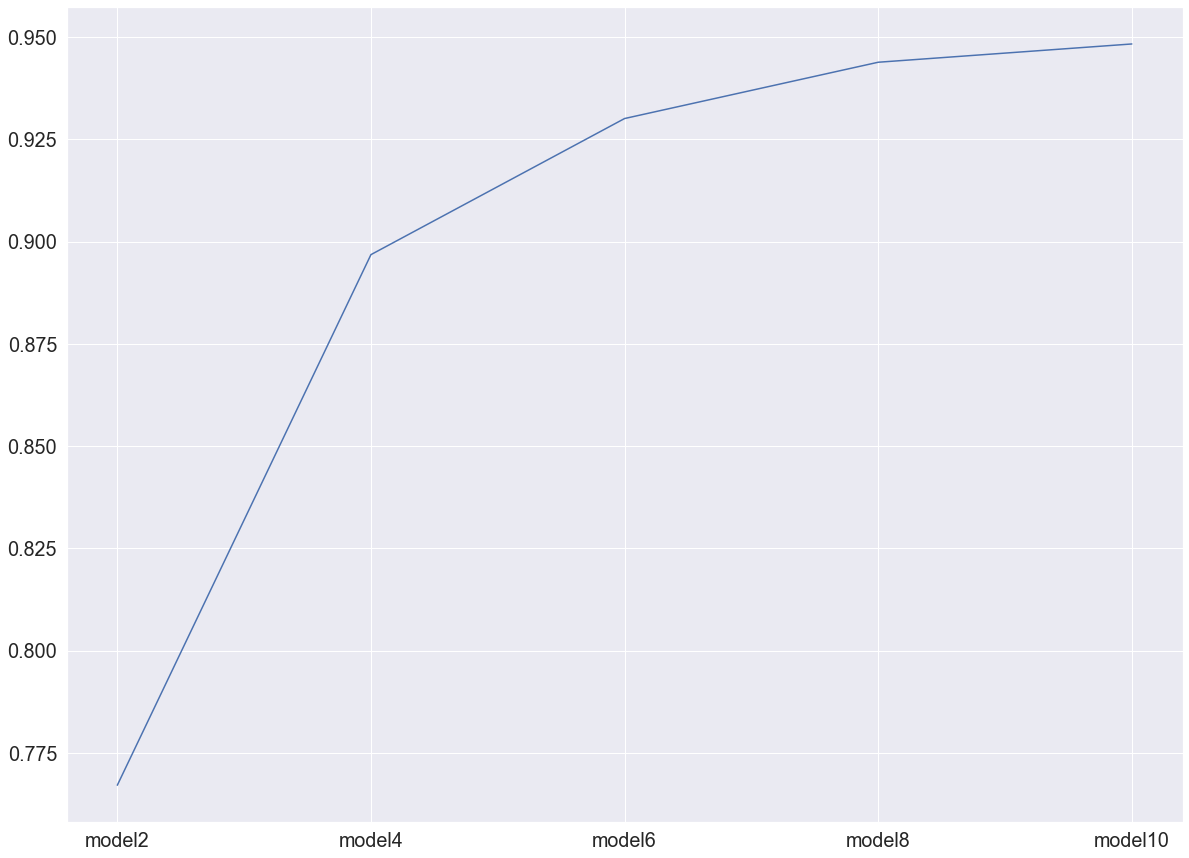

In [24]:
plt.figure(figsize = (20,15))
sns.lineplot(data = results_df.T, legend = False)

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [ ]:
# Your response here
#This shows that the higher the depth, the more effective the model is, although this could be a symptom of overfitting
#paolo: yes, could you  show also the trainig scores on the same plot, that could help you assess the situation.
#paoolo: nice plot again, my advice is to structure the code above into one or more functions to make it easier to use and to extend it.
# Think for example of a function that lets you enter all the different settings for the max_depth and automaically plots the
# trining and test scores. You could use the building blocks you have already made and adapt them.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
#Max depth 10 shows high variance because the model fits itself to the data very well, as a result it has low bias
#The reverse would be true for a max depth of 1
#Paolo: yes,to assess overfitting often a comparison with trainig scores is useful

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [25]:
#your code here
#I have chosen model 6, because the improvement in score until model 6 is material, and then plateaus after that
model6 = RandomForestRegressor(max_depth=6, random_state=0)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred6})
#paolo:  I think it is a good decision

,test,predicted
173,23.6,22.160849
274,32.4,30.975383
491,13.6,16.341843
72,22.8,23.049459
452,16.1,17.300436
...,...,...
418,8.8,8.751229
117,19.2,21.171101
42,25.3,23.387168
322,20.4,22.030489


#### Use the mean absolute error (MAE) to calculate the performance of the model

In [26]:
#your code here
import sklearn.metrics
sklearn.metrics.mean_absolute_error(y_test, y_pred6)

2.2176266978723094

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [27]:
#your code here
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_pred6)
rmse = math.sqrt(mse)
rmse

3.359926966589659

#### Create a function that calculates  and returns the r2 score as performance metric

In [28]:
#your code here
def r2_score(y_test, y_pred):
    return sklearn.metrics.r2_score(y_test, y_pred)

#### Calculate the r2 score of the model using the function defined above

In [29]:
#your code here
r2_score(y_test, y_pred6)

0.8387895231519238

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [30]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [31]:
#Your response here
#This data is too far out of date to be relevant as house prices have changed greatly in 40 years
#The inclusion of 'lower status' population metrics and metrics based on race are problematic 
#Data points that I miss include - garden space, garage space, size of dwelling and other physical attributes of the dwelling
#This data wouldnt be relevant in a rural city because of the focus on highways and industrial parks.

#For this reason, applying this model to a city or area vastly different to Boston, or even to Boston in 2020
#would not make sense, as the training data is too specific 

In [ ]:
#paolo: good work!